In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("solarpowergeneration (2).csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [3]:
df.shape


(2920, 10)

In [5]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [7]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [8]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [9]:
df.fillna(method='ffill', inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

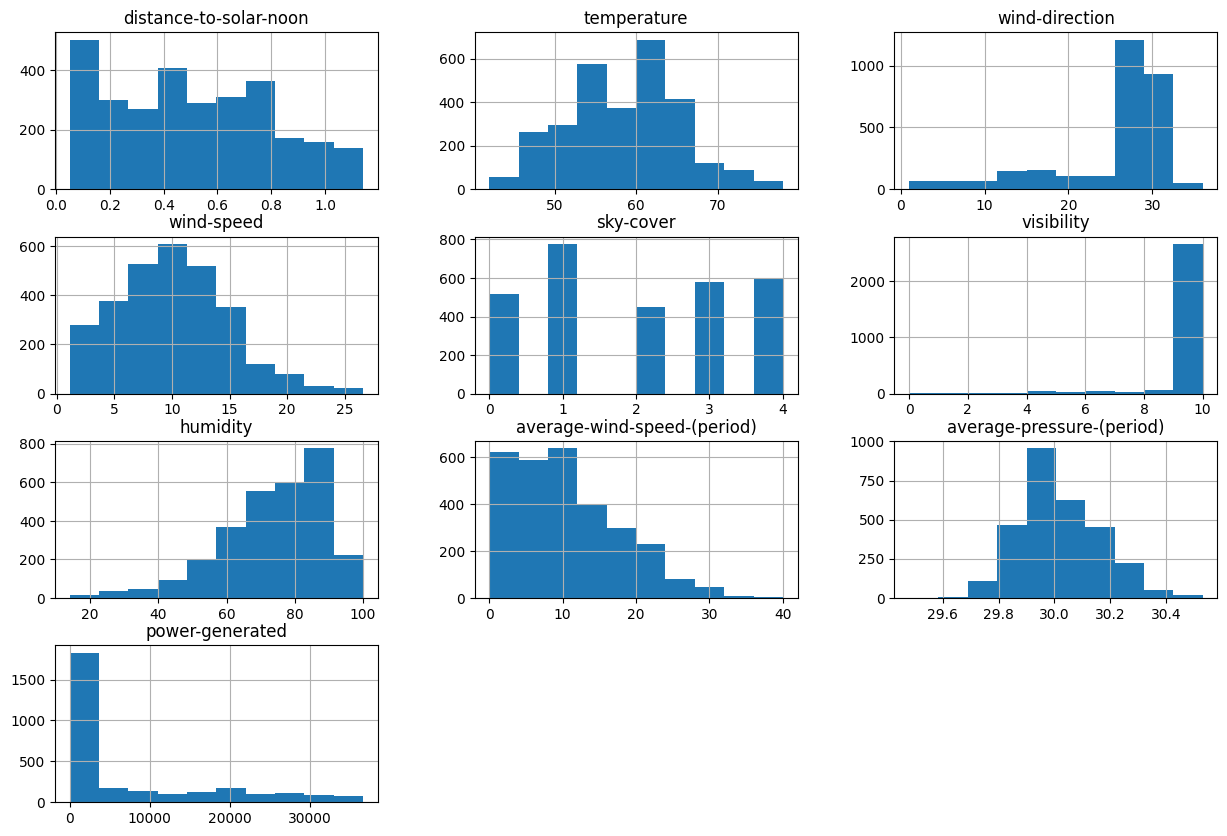

In [11]:
df.hist(figsize=(15,10))
plt.show()

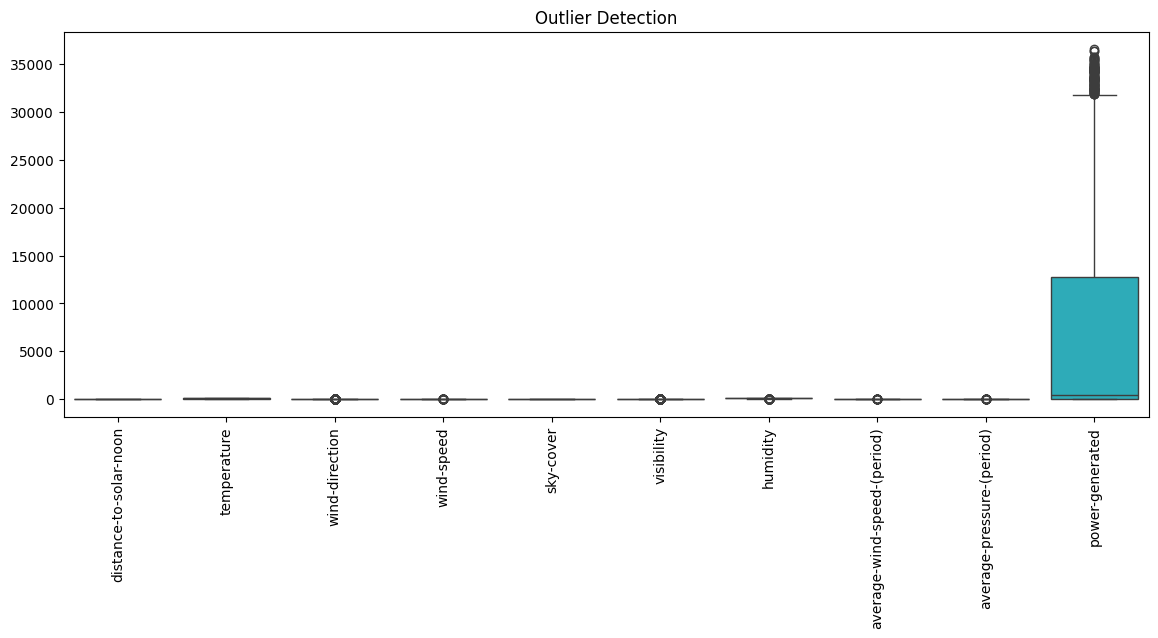

In [12]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | 
            (df > (Q3 + 1.5 * IQR))).sum()
outliers

distance-to-solar-noon           0
temperature                      0
wind-direction                 528
wind-speed                      40
sky-cover                        0
visibility                     429
humidity                        83
average-wind-speed-(period)     25
average-pressure-(period)       31
power-generated                107
dtype: int64

In [14]:
for col in df.columns:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df[col] = np.clip(df[col], lower, upper)

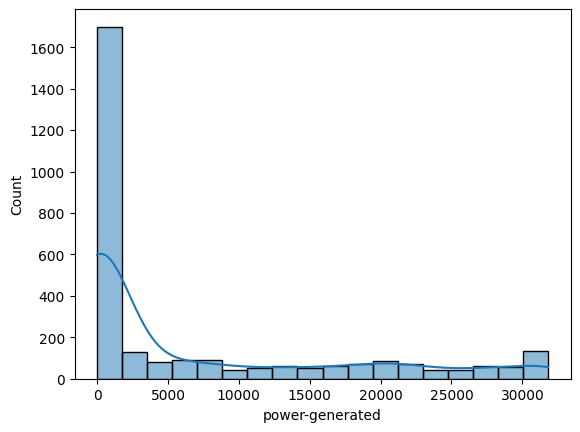

In [15]:
sns.histplot(df['power-generated'], kde=True)
plt.show()

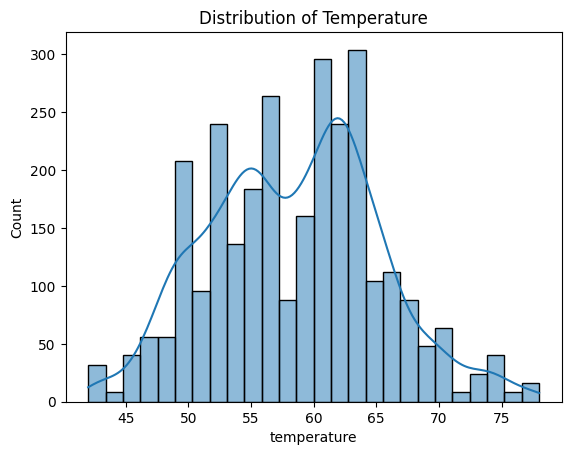

In [16]:
sns.histplot(df['temperature'], kde=True)
plt.title("Distribution of Temperature")
plt.show()

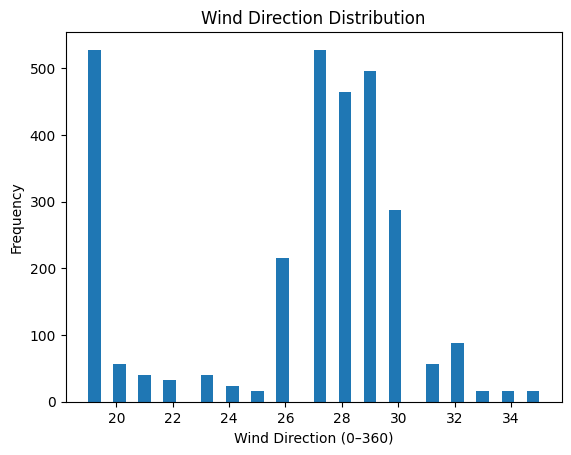

In [17]:
plt.hist(df['wind-direction'], bins=36)
plt.xlabel("Wind Direction (0–360)")
plt.ylabel("Frequency")
plt.title("Wind Direction Distribution")
plt.show()

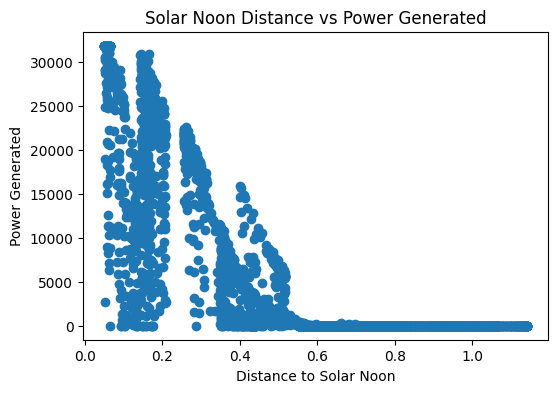

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(df['distance-to-solar-noon'], df['power-generated'])
plt.xlabel('Distance to Solar Noon')
plt.ylabel('Power Generated')
plt.title('Solar Noon Distance vs Power Generated')
plt.show()

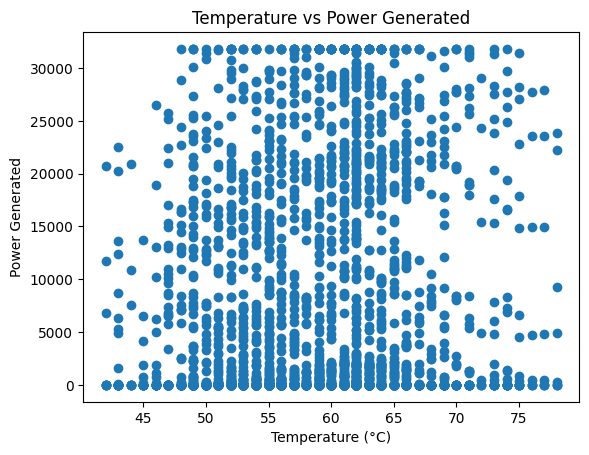

In [19]:
plt.scatter(df['temperature'], df['power-generated'])
plt.xlabel("Temperature (°C)")
plt.ylabel("Power Generated")
plt.title("Temperature vs Power Generated")
plt.show()

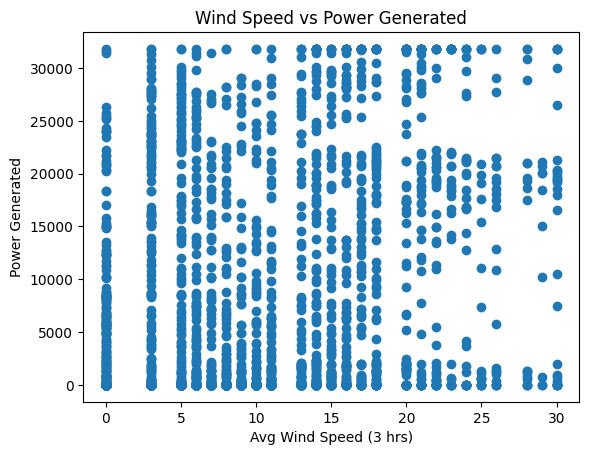

In [20]:
plt.scatter(df['average-wind-speed-(period)'], df['power-generated'])
plt.xlabel("Avg Wind Speed (3 hrs)")
plt.ylabel("Power Generated")
plt.title("Wind Speed vs Power Generated")
plt.show()

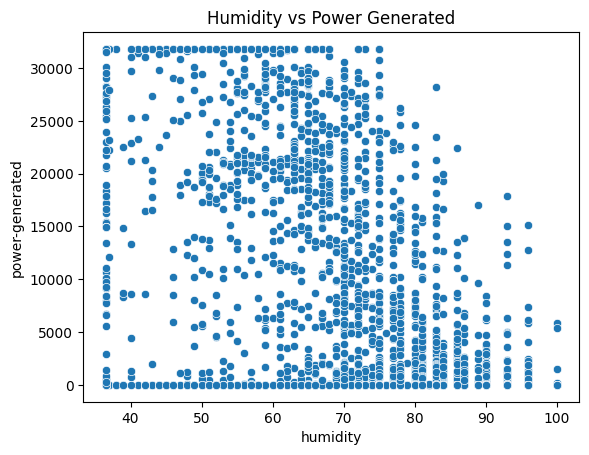

In [21]:
sns.scatterplot(x='humidity', y='power-generated', data=df)
plt.title("Humidity vs Power Generated")
plt.show()

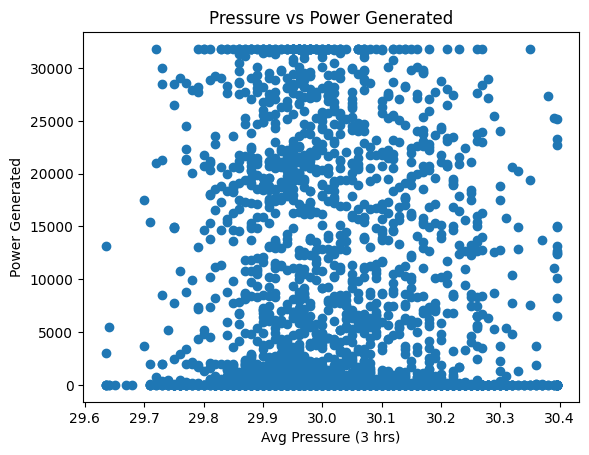

In [22]:
plt.scatter(df['average-pressure-(period)'], df['power-generated'])
plt.xlabel("Avg Pressure (3 hrs)")
plt.ylabel("Power Generated")
plt.title("Pressure vs Power Generated")
plt.show()

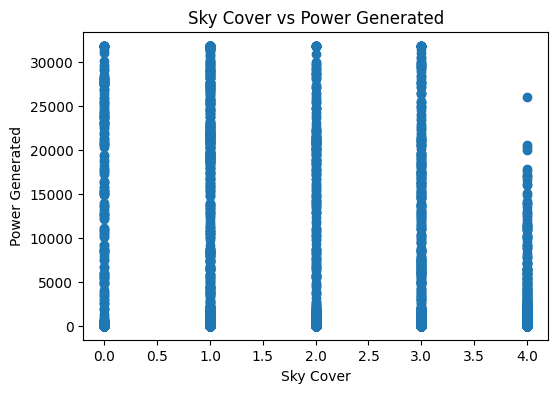

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(df['sky-cover'], df['power-generated'])
plt.xlabel('Sky Cover')
plt.ylabel('Power Generated')
plt.title('Sky Cover vs Power Generated')
plt.show()

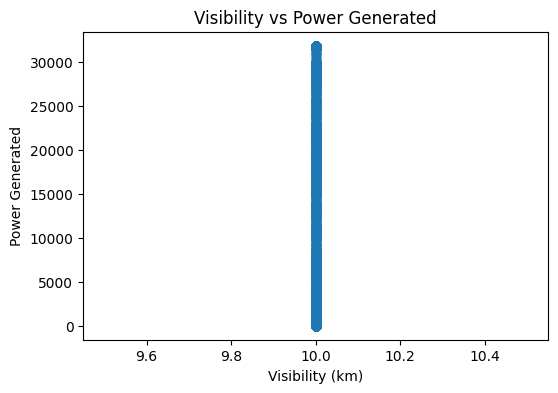

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(df['visibility'], df['power-generated'])
plt.xlabel('Visibility (km)')
plt.ylabel('Power Generated')
plt.title('Visibility vs Power Generated')
plt.show()


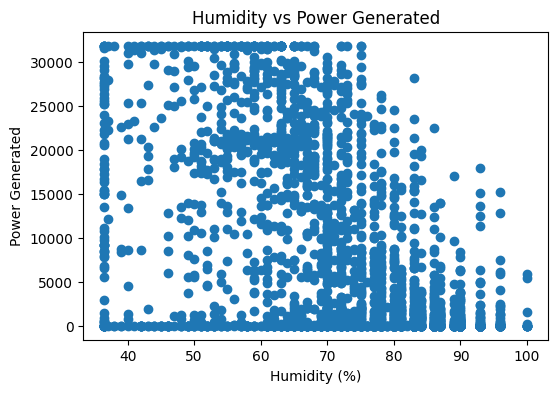

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(df['humidity'], df['power-generated'])
plt.xlabel('Humidity (%)')
plt.ylabel('Power Generated')
plt.title('Humidity vs Power Generated')
plt.show()

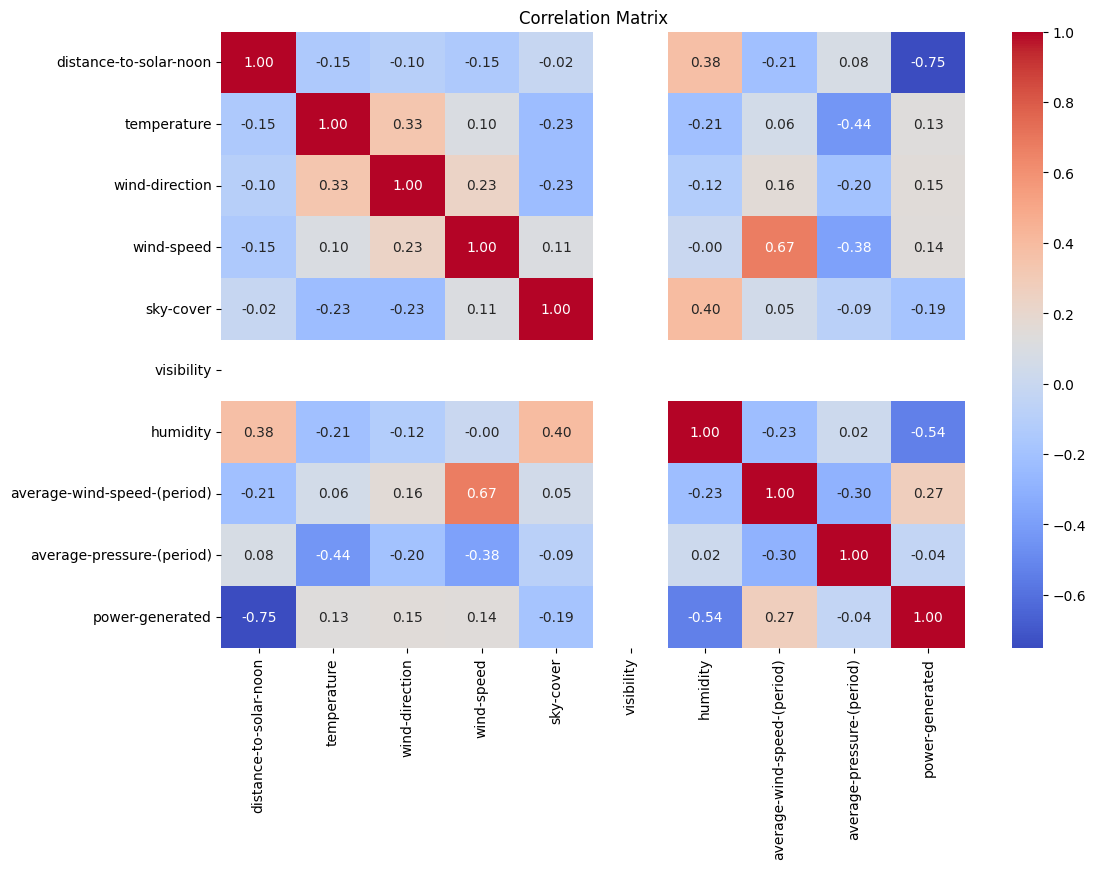

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


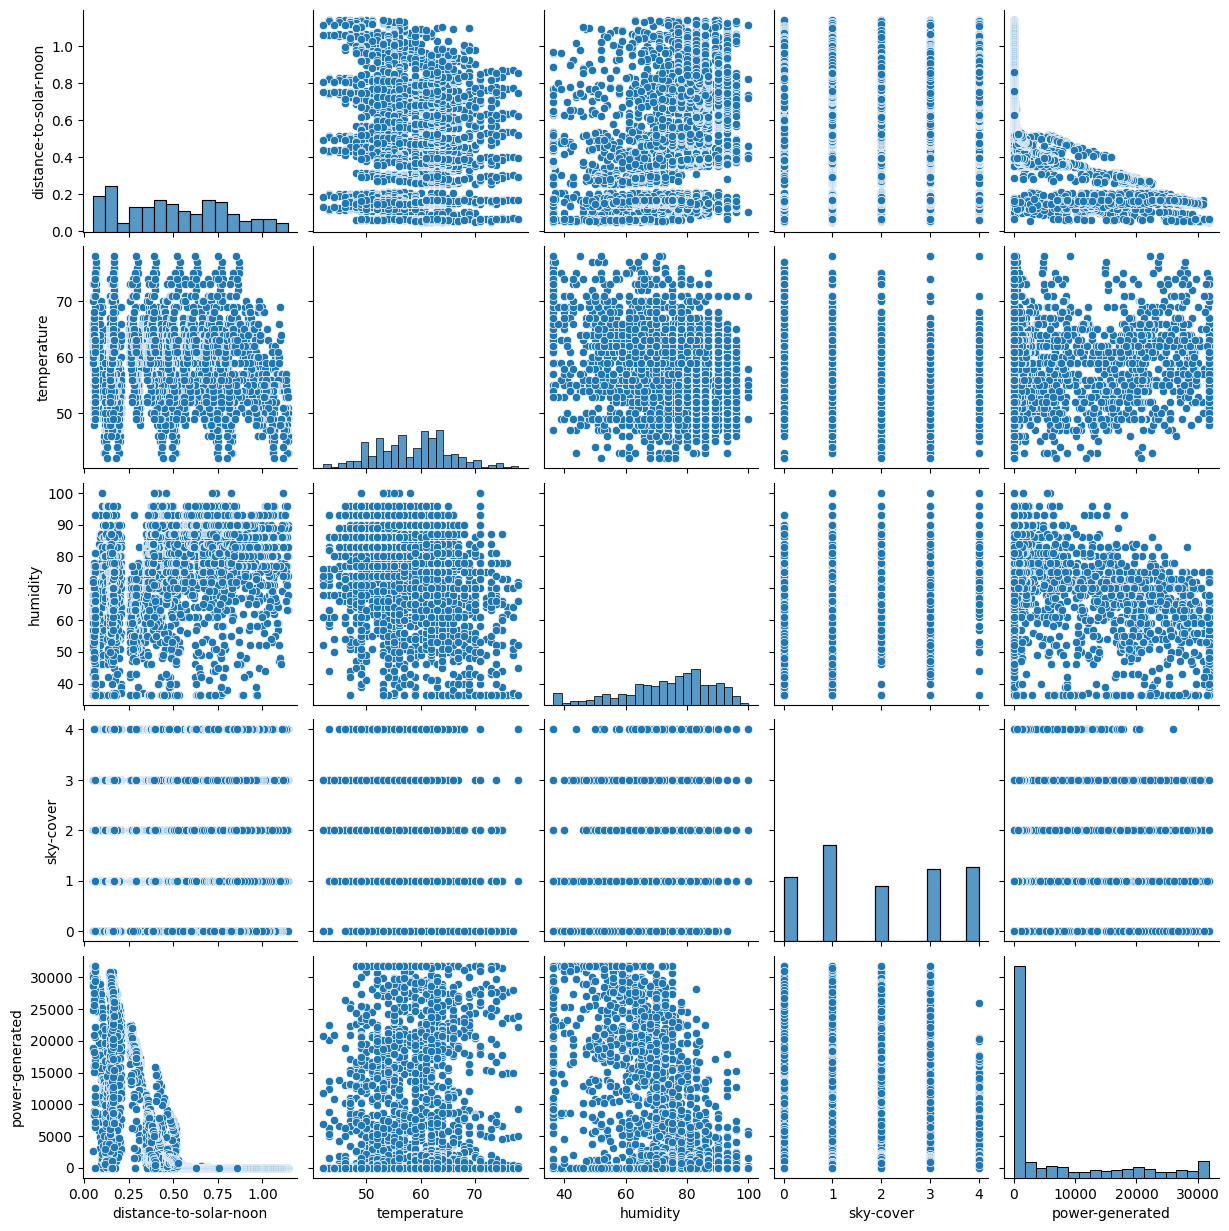

In [28]:
sns.pairplot(df[['distance-to-solar-noon', 'temperature',
                 'humidity', 'sky-cover', 'power-generated']])
plt.show()



In [29]:
df.skew()

distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -0.759444
wind-speed                     0.320330
sky-cover                      0.080284
visibility                     0.000000
humidity                      -0.725126
average-wind-speed-(period)    0.552374
average-pressure-(period)      0.368321
power-generated                1.260141
dtype: float64

#MODEL BUILDING

In [30]:
# Get feature importance values
importance = pd.Series(xgb.feature_importances_, index=X.columns)

# Sort values
importance = importance.sort_values()

# Plot
plt.figure(figsize=(8,6))
importance.plot(kind="barh")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.show()


In [31]:
# X = input features (all except target)
X = df.drop("power-generated", axis=1)

# y = target variable
y = df["power-generated"]

# Split data into train and test sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


In [33]:
# Feature Scaling for liner Regression
# Create scaler object
scaler = StandardScaler()

# Fit only on training data and transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler

,copy,True
,with_mean,True
,with_std,True


In [34]:
###Linear Regression Model

In [35]:
# Create model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)

# Make predictions
lr_pred = lr.predict(X_test)


random forest regressor

In [36]:
# Create Random Forest model
rf = RandomForestRegressor(
    n_estimators=200,     # number of trees
    random_state=42
)

# Train model
rf.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)

xgboost regressor

In [37]:
# Create XGBoost model
xgb = XGBRegressor(
    n_estimators=300,     # number of boosting rounds
    learning_rate=0.05,   # step size
    max_depth=5,          # depth of trees
    random_state=42
)

# Train model
xgb.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb.predict(X_test)

model evaluation

In [38]:
#Creat Evaluation Function
def evaluate_model(name, y_true, y_pred):
    
    # Calculate metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Print results
    print(f"\n{name} Results")
    print("R2 Score :", r2)
    print("MAE :", mae)
    print("RMSE :", rmse)
    
    return [name, r2, mae, rmse]

In [39]:
# Evaluate All Models
results = []

results.append(evaluate_model("Linear Regression", y_test, lr_pred))
results.append(evaluate_model("Random Forest", y_test, rf_pred))
results.append(evaluate_model("XGBoost", y_test, xgb_pred))


Linear Regression Results
R2 Score : 0.632454135170286
MAE : 4872.789060409163
RMSE : 6114.136766810894

Random Forest Results
R2 Score : 0.8876878538448191
MAE : 1520.2955372431506
RMSE : 3379.813542748525

XGBoost Results
R2 Score : 0.9014580928101039
MAE : 1561.7255811809678
RMSE : 3165.8465488014663


In [40]:
# Comparison Table
results_df = pd.DataFrame(
    results,
    columns=["Model", "R2 Score", "MAE", "RMSE"]
)

print("\nModel Comparison Table")
print(results_df)


Model Comparison Table
               Model  R2 Score          MAE         RMSE
0  Linear Regression  0.632454  4872.789060  6114.136767
1      Random Forest  0.887688  1520.295537  3379.813543
2            XGBoost  0.901458  1561.725581  3165.846549


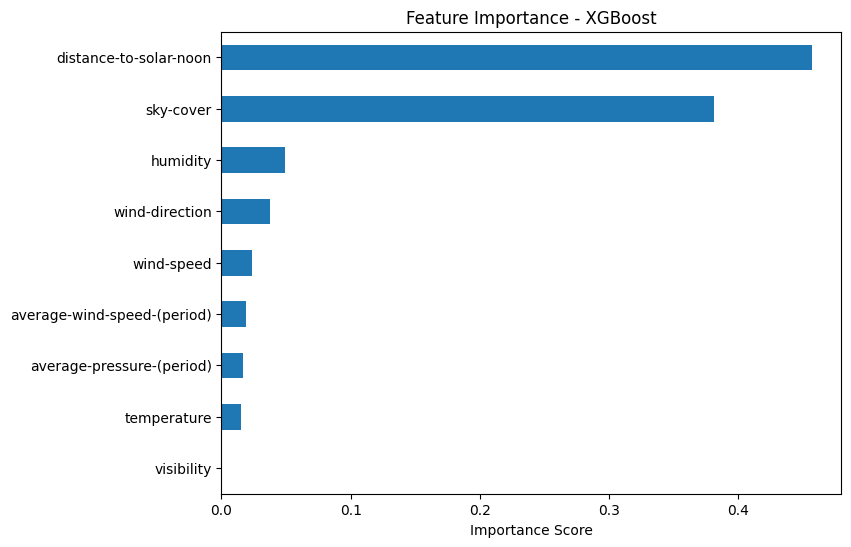

In [41]:
# Get feature importance values
importance = pd.Series(xgb.feature_importances_, index=X.columns)

# Sort values
importance = importance.sort_values()

# Plot
plt.figure(figsize=(8,6))
importance.plot(kind="barh")
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.show()


In [42]:
import joblib

# Save trained model
joblib.dump(xgb, "solar_model.pkl")

# Save scaler (if using scaling)
joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler Saved Successfully")

Model and Scaler Saved Successfully


In [ ]:
# streamlit
import streamlit as st
import numpy as np
import joblib

# Load saved model and scaler
model = joblib.load("solar_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("🌞 Solar Power Generation Prediction")

st.write("Enter weather details to predict solar power output.")

# Input fields
distance = st.number_input("Distance to Solar Noon", value=0.0)
temperature = st.number_input("Temperature (°C)", value=25)
wind_speed = st.number_input("Wind Speed (m/s)", value=5.0)
sky_cover = st.number_input("Sky Cover", value=2)
visibility = st.number_input("Visibility (km)", value=10.0)
humidity = st.number_input("Humidity (%)", value=50)
avg_wind = st.number_input("Average Wind Speed (Period)", value=5.0)
pressure = st.number_input("Average Pressure (Period)", value=1013.0)

# Prediction button
if st.button("Predict Solar Power"):

    # Arrange input in same order as training
    features = np.array([[distance, temperature, wind_speed,
                          sky_cover, visibility, humidity,
                          avg_wind, pressure]])

    # Apply scaling
    features_scaled = scaler.transform(features)

    # Make prediction
    prediction = model.predict(features_scaled)

    st.success(f"Predicted Solar Power: {prediction[0]:.2f}")